In [1]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 6.3 MB 37.6 MB/s 
     |████████████████████████████████| 15.4 MB 32.5 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install contextily
import contextily as ctx 

     |████████████████████████████████| 19.3 MB 40.0 MB/s 


In [4]:
Piste_Ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf')
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
Fontanelle = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Fontanelle/Fontanelle_OSM_ODbL.dbf")
Parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon/Parchi_regionali_e_nazionali_polygon.dbf")
Comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")
Province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
Regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")

In [5]:
Comuni.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
Parchi.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

1. visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)



In [7]:
Milano = Comuni[Comuni.COMUNE=='Milano']
Milano

COD_RIP  ...                                           geometry
1882        1  ...  POLYGON ((513714.538 5042508.056, 513985.199 5...

[1 rows x 13 columns]

In [8]:
ParchiMilano = Parchi[Parchi.intersects(Milano.geometry.squeeze())]
ParchiMilano

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

In [9]:
ComuniParchi = Comuni[Comuni.intersects(ParchiMilano.unary_union)]
ComuniParchi

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1817        1  ...  POLYGON ((499326.672 5038880.244, 499885.260 5...
...       ...  ...                                                ...
7465        1  ...  POLYGON ((534210.409 5035224.602, 534551.968 5...
7484        1  ...  POLYGON ((534698.954 5033625.792, 534731.476 5...
7486        1  ...  POLYGON ((530678.622 5027337.660, 530960.619 5...
7500        1  ...  POLYGON ((529834.629 5021137.707, 530206.624 5...
7506        1  ...  POLYGON ((534164.595 5029853.641, 534184.596 5...

[88 rows x 13 columns]

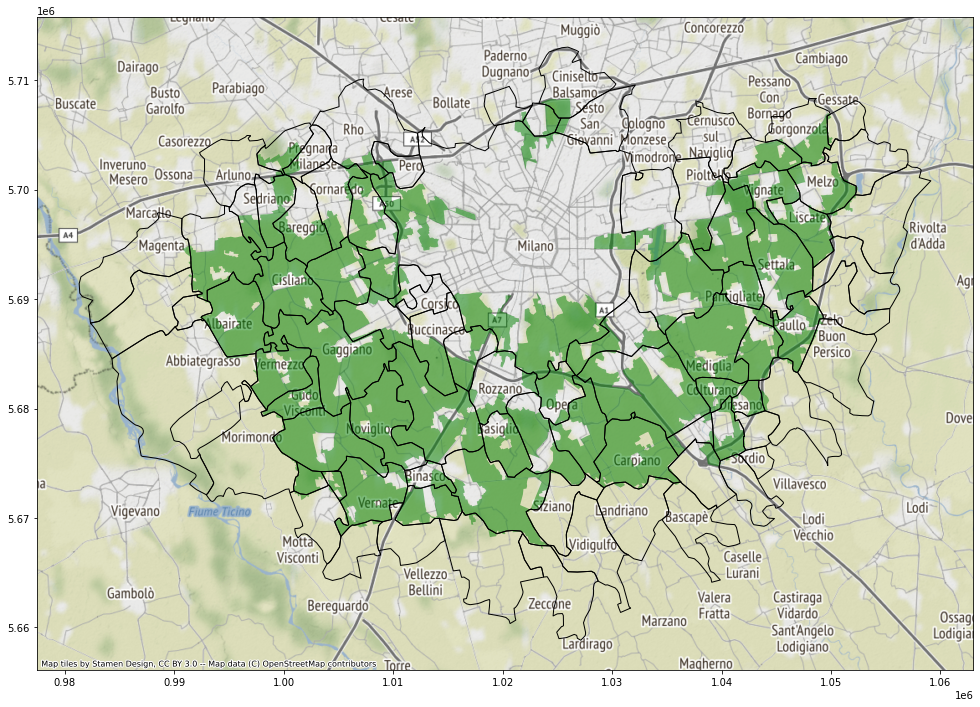

In [10]:
ax = ParchiMilano.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='green',alpha=0.5)
ComuniParchi.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

Visualizzare i comuni confinanti con Milano

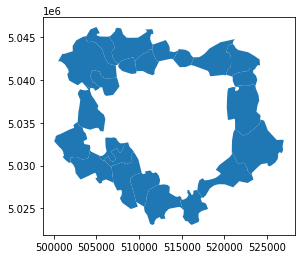

In [11]:
ComuniConfinanti = Comuni[Comuni.touches(Milano.unary_union)]
ComuniConfinanti.plot()

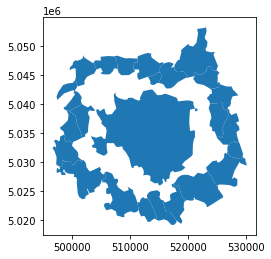

In [12]:
ComuniConfinanti2 = Comuni[Comuni.touches(ComuniConfinanti.unary_union)]
ComuniConfinanti2.plot()

il meno esteso comune confinante con Milano

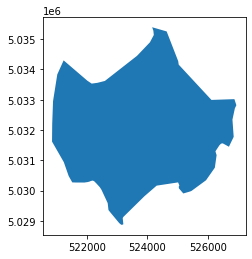

In [13]:
ComuniPiuEsteso = ComuniConfinanti[ComuniConfinanti.Shape_Area==ComuniConfinanti.Shape_Area.max()]
ComuniPiuEsteso.plot()

il meno esteso comune confinante con Milano

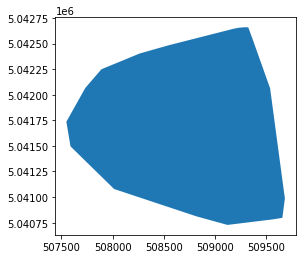

In [14]:
ComuniMenoEsteso = ComuniConfinanti[ComuniConfinanti.Shape_Area==ComuniConfinanti.Shape_Area.min()]
ComuniMenoEsteso.plot()

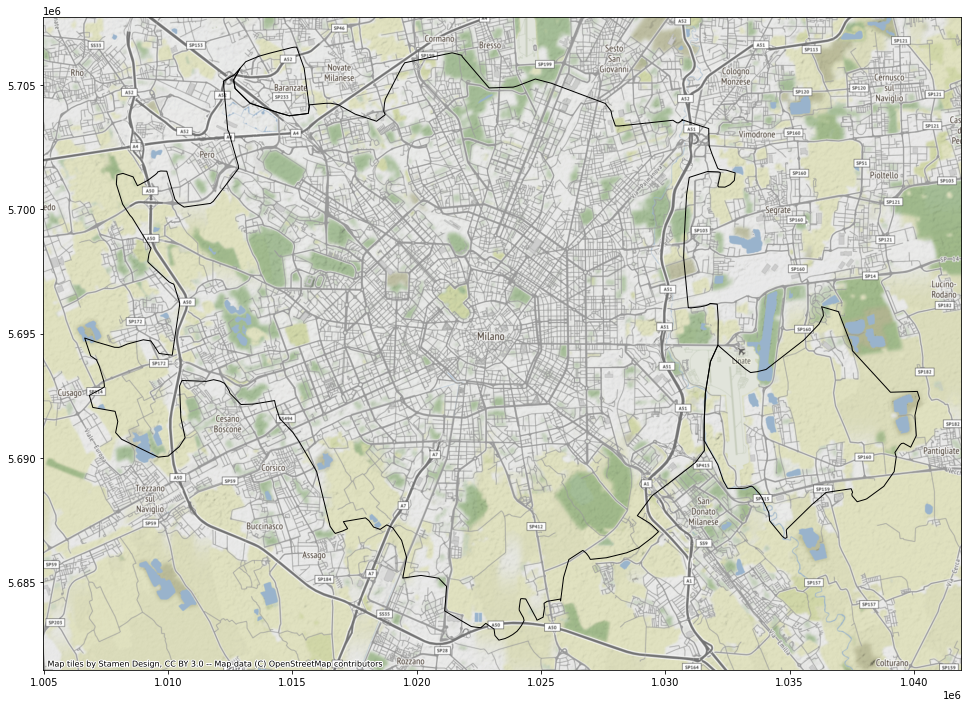

In [15]:
ax = Milano.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
ComuniPiuEsteso.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ComuniMenoEsteso.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)


In [16]:
QuartieriParchi = Quartieri[Quartieri.intersects(ParchiMilano.to_crs(epsg=4326).geometry.unary_union)]
QuartieriParchi

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
9       61  ...  POLYGON ((9.11143 45.47640, 9.11193 45.47624, ...
10      60  ...  POLYGON ((9.13020 45.48464, 9.13075 45.48449, ...
11      62  ...  POLYGON ((9.08375 45.48485, 9.08444 45.48459, ...
20      83  ...  POLYGON ((9.17808 45.53479, 9.17807 45.53439, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
26      46  ...  POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
30      14  ...  POLYGON ((9.21337 45.52948, 9.21337 45.52948, ...
31      32  ...  POLYGON ((9.26378 45.43251, 9.26384 45.43248, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
38      38  ...  POLYGON ((9.20060 45.43608, 9.20429 45.43642, ...
41      35  ...  POLYGON ((9.23480 45.44588, 9.23480 45.44569, ...
42      54  ...  POLYGON ((9.07736 45.45589, 9.07671 45.45364, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
47      65  ...  POLYGON ((9.09884 45.50652, 9.09884 45.50651, ...
50      41  ...  POLYGON ((9.17334 45.42346, 9.17402 45.42205, ...
52      56  ...  POLYGON ((9.12613 45.46928, 9.12638 45.46851, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...
59      42  ...  POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...
61      36  ...  POLYGON ((9.21561 45.43849, 9.21685 45.43686, ...
65      55  ...  POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...
66      24  ...  POLYGON ((9.26017 45.47147, 9.26018 45.47143, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[29 rows x 9 columns]

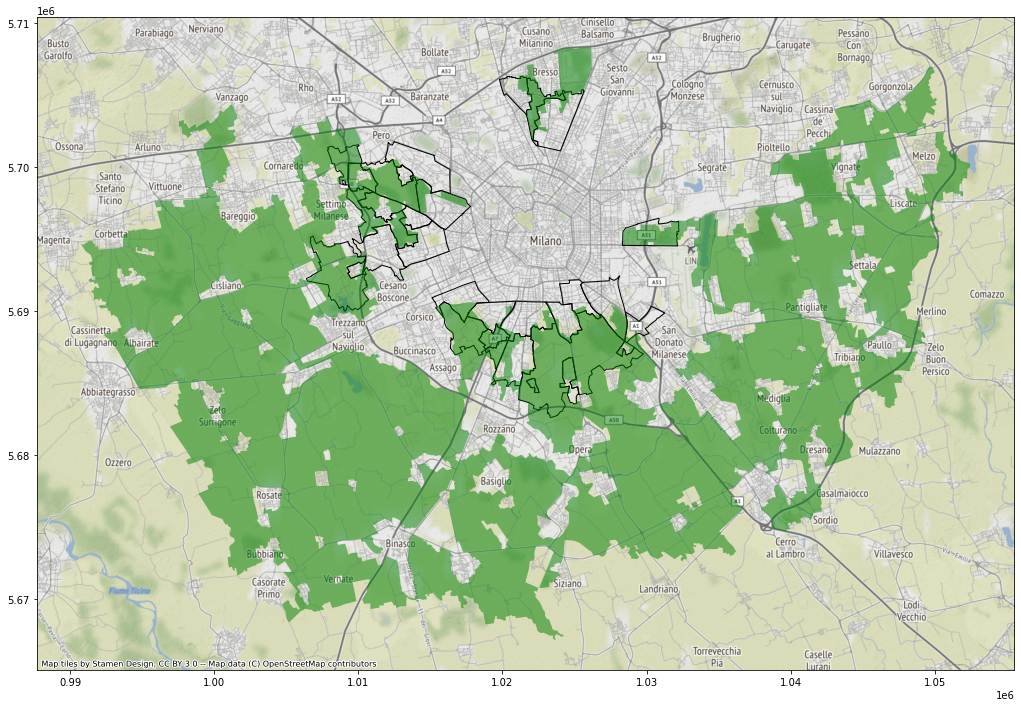

In [17]:
ax = QuartieriParchi.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
ParchiMilano.to_crs(epsg=3857).plot(ax=ax,facecolor='green',alpha=0.5)
ctx.add_basemap(ax)

3  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano


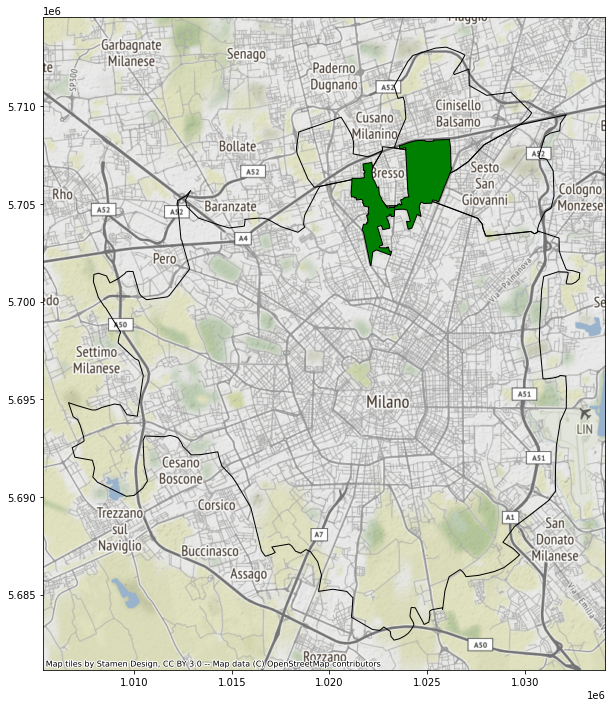

In [ ]:
user = input("Nome Parco: ")
lst = list(Parchi['NOME'])
if user not in lst:
  print("Parco Non presente")
else:
  Parco = Parchi[Parchi.NOME==user]
  ParchiComuni = Comuni[Comuni.intersects(Parco.unary_union)]
  ax = ParchiComuni.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  Parco.to_crs(epsg=3857).plot(ax=ax,facecolor='green',edgecolor='k')
  ctx.add_basemap(ax)

4. dato il nome di un parco, avere la mappa del parco con le province che attraversa


Nome Parco: Parco Nord Milano


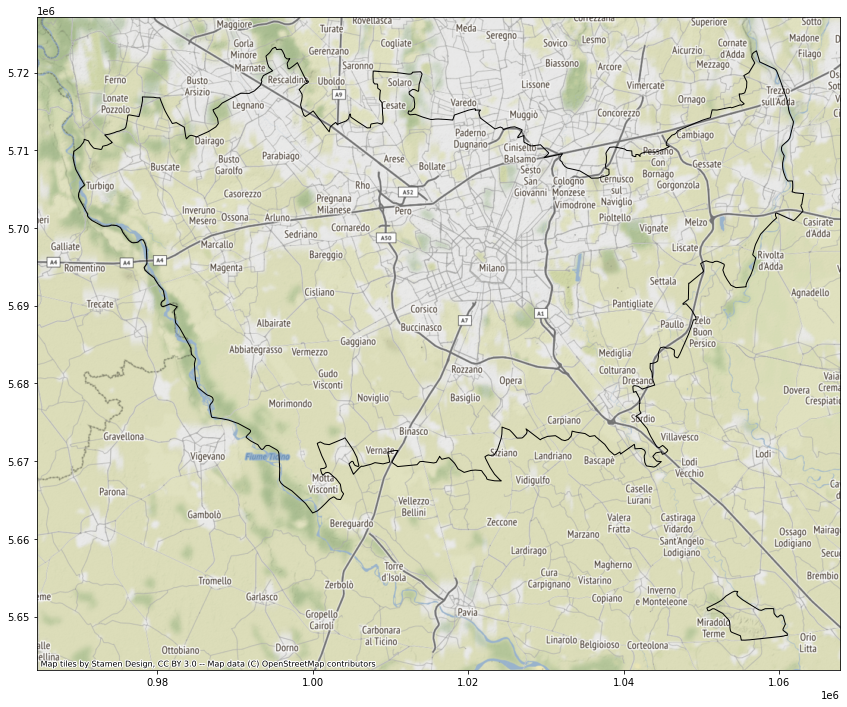

In [21]:
user = input("Nome Parco: ")
lst = list(Parchi['NOME'])
if user not in lst:
  print("Parco Non presente")
else:
  ParcoProv = Parchi[Parchi.NOME==user]
  ParchiComuni = Province[Province.intersects(ParcoProv.unary_union)]
  ax = ParchiComuni.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  ctx.add_basemap(ax)

5. dato un comune, avere i parchi che ospita (elenco e mappa)


Nome Comune: Milano


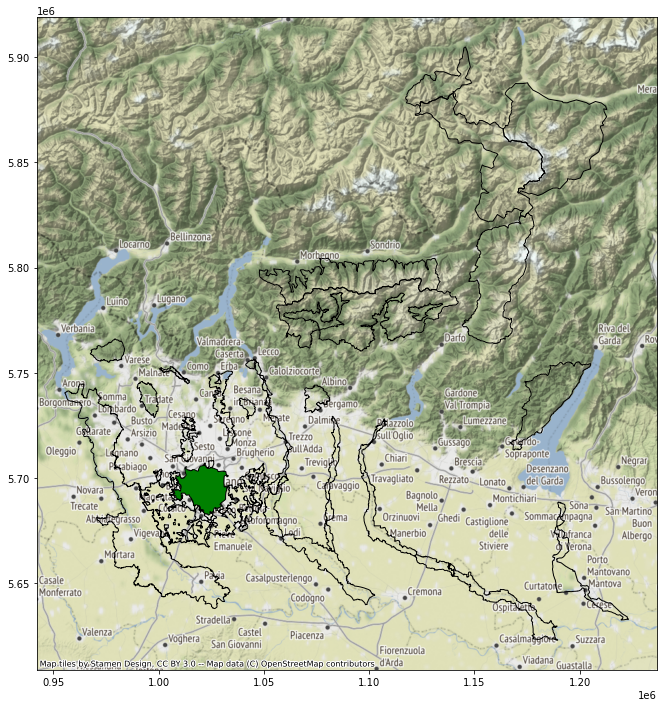

In [22]:
user = input("Nome Comune: ")
lst = list(Comuni['COMUNE'])
if user not in lst:
  print("Parco Non presente")
else:
  ComParco = Comuni[Comuni.COMUNE==user]
  ComuniParco = Parchi[Parchi.intersects(Comuni.unary_union)]
  ax = ComuniParco.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  ComParco.to_crs(epsg=3857).plot(ax=ax,facecolor='green',edgecolor='k')
  ctx.add_basemap(ax)

6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

Nome Provincia: Vercelli


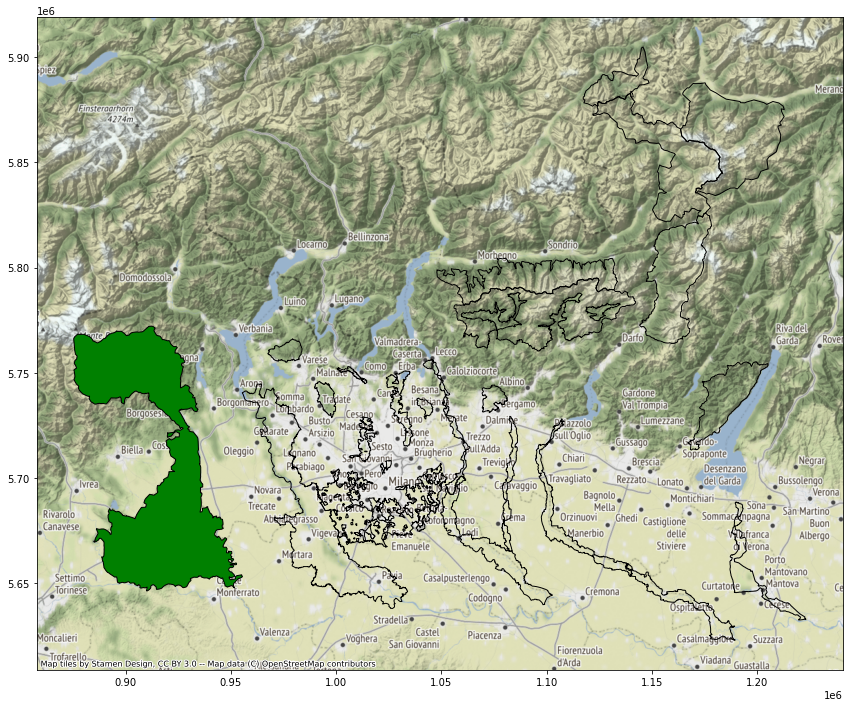

In [25]:
user = input("Nome Provincia: ")
lst = list(Province['DEN_UTS'])
if user not in lst:
  print("Parco Non presente")
else:
  ProvinceParco = Province[Province.DEN_PROV==user]
  ProvParco = Parchi[Parchi.intersects(Province.unary_union)]
  ax = ProvParco.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  ProvinceParco.to_crs(epsg=3857).plot(ax=ax,facecolor='green',edgecolor='k')
  ctx.add_basemap(ax)

In [24]:
Province

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]